# Bright Data: Download and Analyze Data with Dataset Marketplace

Welcome to this tutorial on using **[Bright Data](!https://get.brightdata.com/aibuilders)'s IMDB Media Dataset**. This guide will walk you through accessing this rich dataset, loading it into a pandas DataFrame, and performing exploratory data analysis. We'll uncover insights from the movie data, such as popular genres and top-rated films.

This notebook provides a practical, real-world example to help you get started with analyzing large-scale media datasets from Bright Data. Let's dive in! 🎬

## 1. Setup and Installation

First, let's set up our environment. This involves installing the necessary Python libraries and configuring your Bright Data API key.

### 1.0. Create a Bright Data Account & Get the IMDB Snapshot ID

Follow these steps to register and obtain the snapshot ID for the FREE IMDB Media dataset:

1.Sign Up:
   - Go to [Bright Data](!https://get.brightdata.com/aibuilders) and click Sign Up.
   - Create an account with email + password (or use Google/GitHub SSO).
   - Verify your email if prompted.

2.Generate an API Token:
   - In the Bright Data dashboard, open the top-right menu (avatar) > Account settings (or API & Integrations).
   - Find the API / Access tokens section.
   - Click Create / New token, give it a name (e.g. `imdb-tutorial`), and copy the token.
   - Store it in your `.env` file as:
     ```
     BRIGHT_DATA_API_KEY="your_token_here"
     ```

3.Locate the IMDB Media Dataset:
   - In the sidebar, go to Datasets > Dataset Marketplace.
   - Search for "IMDB" (look for something like "IMDB Media" or similar naming).
   - Open the dataset page. Many marketplace pages show sample schema and pricing; Bright Data often provides a free tier / sample snapshot depending on your plan.

4.Create / Access a Snapshot:
   - On the dataset page, click a button such as "Create snapshot" / "Download sample".
   - After creation, a Snapshot ID (starts with `snap_...`) will appear in the UI or in the API example snippet.
   - Copy that Snapshot ID. In this tutorial we use:
     ```
     snap_mewa1lct2l63mtpvge
     ```
     (If this snapshot becomes unavailable later, repeat the creation step to get a fresh ID.)

Once you have the token in your `.env` file (`BRIGHT_DATA_API_KEY`) and the snapshot ID, proceed with the installation steps below.

### 1.1. Installing Libraries

We'll need `requests` to download the dataset, `pandas` for data manipulation, and `python-dotenv` to manage the API key. You can install these using pip:

In [16]:
#!pip install requests pandas python-dotenv matplotlib -q

### 1.2. Managing API Keys with `.env`

It's a best practice to store your API keys in a `.env` file to keep them secure. Create a file named `.env` in the same directory as this notebook and add your Bright Data API key:

```
BRIGHTDATA_API_KEY="your_brightdata_api_key"
```

Now, we'll load this environment variable into our notebook (the code below expects the variable name `BRIGHTDATA_API_KEY`).

In [ ]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import csv
import json

# Load environment variables from .env file
load_dotenv()

# Get the API key (expects BRIGHTDATA_API_KEY in your .env file)
api_key = os.getenv("BRIGHT_DATA_API_KEY")

if not api_key:
    raise ValueError("Missing BRIGHTDATA_API_KEY environment variable. Make sure it is set in your .env file.")

## 2. Accessing the IMDB Media Dataset

Bright Data provides access to comprehensive datasets like the IMDB Media dataset. We will now use the provided Python script to download a snapshot of this dataset and load it into a pandas DataFrame. The script is designed to efficiently stream the data and handle large files.

In [17]:
import csv
import requests
import pandas as pd

SNAPSHOT_ID = "snap_mewa1lct2l63mtpvge"
URL = f"https://api.brightdata.com/datasets/snapshots/{SNAPSHOT_ID}/download?format=csv"

if not api_key:
    raise ValueError("Missing BRIGHT_DATA_API_KEY (ensure it's set and loaded before running).")

response = requests.get(
    URL,
    headers={"Authorization": f"Bearer {api_key}"},
    stream=True,
    timeout=120,
)

if response.status_code != 200:
    print("HTTP", response.status_code, response.text[:300])
else:
    line_iter = response.iter_lines(decode_unicode=True)

    header_line = next(line_iter, None)
    if not header_line:
        raise ValueError("Empty snapshot (no header line received).")

    header = next(csv.reader([header_line]))

    try:
        title_idx = header.index("title")
    except ValueError:
        title_idx = None  # proceed without title filtering if column absent

    kept_rows = []
    for line in line_iter:
        if len(kept_rows) >= 100:
            break
        if not line.strip():
            continue
        row = next(csv.reader([line]))

        if title_idx is not None:
            title_val = row[title_idx].strip().lower()
            if title_val in ("", "null", "none", "nan"):
                continue

        kept_rows.append(row)

    df_marketplace = pd.DataFrame(kept_rows, columns=header)
    print(f"Rows kept: {len(df_marketplace)}")
    display(df_marketplace.head())

Rows kept: 100


,title,popularity,genres,presentation,credit,videos,photos,top_cast,details_release_date,details_countries_of_origin,...,imdb_rating_count,awards,critics_review_count,episode_count,review_count,review_rating,featured_review,storyline,boxoffice_budget,id
0,Monster Cruise,,"[""Comédia""]",,"[{""names"":[{""link"":""https://www.imdb.com/name/...",,"[{""link"":""https://www.imdb.com/title/tt1639403...","[{""actor"":""Paul Wallace"",""character"":""Larry"",""...",9/24/2010 (Estados Unidos da América),Estados Unidos da América,...,32,,0,,0,,,,"$650,000.00",tt1639403
1,Marry Me,411,"[""कॉमेडी"",""संगीत"",""रोमांस""]",संगीत सुपरस्टार केट वाल्डेज़ और बैश्चियन वैश्व...,"[{""names"":[{""link"":""https://www.imdb.com/name/...","[{""link"":""https://www.imdb.com/video/vi1156104...","[{""link"":""https://www.imdb.com/title/tt1022346...","[{""actor"":""Jennifer Lopez"",""character"":""Kat"",""...",2/11/2022 (भारत),"चीन, जापान, यूनाइटेड स्टेट्स",...,46964,2 wins,182,,538,7,7/10@marrymemovieI haven&#39;t been embarrasse...,,"$23,000,000.00",tt10223460
2,Una película de Minecraft,90,"[""Acción"",""Aventura"",""Comedia"",""Familiar"",""Fan...",Cuatro inadaptados son arrastrados a través de...,"[{""names"":[{""link"":""https://www.imdb.com/name/...","[{""link"":""https://www.imdb.com/video/vi2465515...","[{""link"":""https://www.imdb.com/title/tt3566834...","[{""actor"":""Jason Momoa"",""character"":""Garrett"",...",4/3/2025 (Nueva Zelanda),"Estados Unidos, Suecia, Nueva Zelanda, Canadá",...,132769,2 wins,167,,1495,6,While I&#39;m not completely familiar with the...,,"$150,000,000.00",tt3566834
3,Vigilante Diaries,,"[""Action"",""Crime"",""Thriller""]",After killing a lot of bad guys including Arme...,"[{""names"":[{""link"":""https://www.imdb.com/name/...","[{""link"":""https://www.imdb.com/video/vi1215673...","[{""link"":""https://www.imdb.com/title/tt3903852...","[{""actor"":""Paul Sloan"",""character"":""The Vigila...",6/24/2016 (United States),United States,...,4756,,21,,21,1,"First of all, I can easily say that I have was...",,"$1,000,000.00",tt3903852
4,Addams Family Values,413,"[""कॉमेडी"",""फ़ैंटेसी""]",परिवार का भविष्य अंधकारमय हो जाता है जब गंदी न...,"[{""names"":[{""link"":""https://www.imdb.com/name/...","[{""link"":""https://www.imdb.com/video/vi2579613...","[{""link"":""https://www.imdb.com/title/tt0106220...","[{""actor"":""Anjelica Huston"",""character"":""Morti...",11/19/1993 (यूनाइटेड स्टेट्स),यूनाइटेड स्टेट्स,...,118665,Won Oscar 1 Oscar 3 wins total,63,,197,,It&#39;s a pleasant surprise to see sequel liv...,,"$47,000,000.00",tt0106220


## 3. Basic Data Cleaning and Analysis

With the data loaded, let's perform some cleaning and basic analysis to extract meaningful insights.

Cleaned data rows: 69

--- Top 10 Genres ---
genres
Drama          29
Thriller       11
Comedy         10
Romance         9
Crime           9
Action          8
Documentary     6
Mystery         6
कॉमेडी          5
History         4
Name: count, dtype: int64

--- Top 10 Highest-Rated Popular Movies ---
                                  title  imdb_rating  imdb_rating_count
54  Apocalypse: La 2ème guerre mondiale          9.0            17284.0
80                 Histoire de jouets 3          8.3           942360.0
51                       The Terminator          8.1           975492.0
61                           La La Land          8.0           730613.0
5                          The Irishman          7.8           458407.0
37             Les Banshees d'Inisherin          7.7           283774.0
24           The Trial of the Chicago 7          7.7           201607.0
99                       A Star Is Born          7.6           439423.0
19                       The Blind Side          

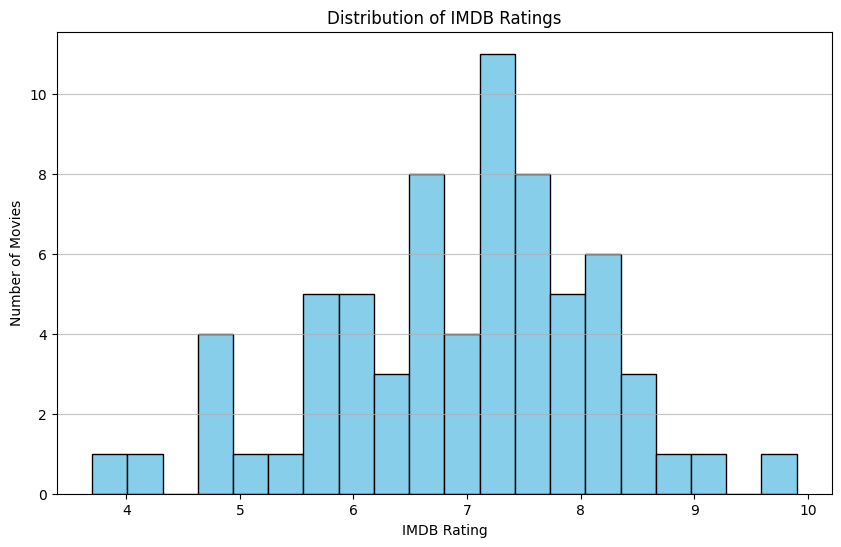

In [18]:
# Basic cleaning & exploratory analysis
import json
import matplotlib.pyplot as plt

if 'df_marketplace' in globals() and not df_marketplace.empty:
    # Convert rating/count columns to numeric
    df_marketplace['imdb_rating'] = pd.to_numeric(df_marketplace.get('imdb_rating'), errors='coerce')
    df_marketplace['imdb_rating_count'] = pd.to_numeric(df_marketplace.get('imdb_rating_count'), errors='coerce')

    # Drop rows missing essentials
    df_cleaned = df_marketplace.dropna(subset=['imdb_rating', 'title', 'genres'])
    df_cleaned = df_cleaned[df_cleaned['title'].str.strip() != '']

    print(f"Cleaned data rows: {len(df_cleaned)}")

    # --- Analysis 1: Most Common Genres ---
    def parse_genres(genres_str):
        try:
            return json.loads(genres_str.replace("'", '"'))
        except (json.JSONDecodeError, AttributeError):
            return []

    all_genres = df_cleaned['genres'].apply(parse_genres).explode()
    genre_counts = all_genres.value_counts()

    print("\n--- Top 10 Genres ---")
    print(genre_counts.head(10))

    # --- Analysis 2: Highest-Rated Movies (with >10k ratings) ---
    popular_movies = df_cleaned[df_cleaned['imdb_rating_count'] > 10000]
    top_movies = popular_movies.sort_values(by='imdb_rating', ascending=False)

    print("\n--- Top 10 Highest-Rated Popular Movies ---")
    print(top_movies[['title', 'imdb_rating', 'imdb_rating_count']].head(10))

    # --- Analysis 3: Rating Distribution ---
    plt.figure(figsize=(10, 6))
    plt.hist(df_cleaned['imdb_rating'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of IMDB Ratings')
    plt.xlabel('IMDB Rating')
    plt.ylabel('Number of Movies')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("DataFrame 'df_marketplace' is empty or not defined.")

## 4. Conclusion

Congratulations! You have successfully downloaded the Bright Data IMDB Media dataset, performed essential cleaning steps, and conducted an initial analysis to uncover interesting trends.

We have covered how to:
- **Securely manage API keys** for accessing Bright Data services.
- **Download a large dataset** and load it into a pandas DataFrame.
- **Clean and prepare the data** for analysis by handling missing values and converting data types.
- **Analyze the data** to find the most common genres, identify top-rated movies, and visualize the distribution of ratings.

This tutorial provides a solid foundation for more advanced analysis. You can now explore other aspects of the dataset, such as box office performance, release date trends, or cast and crew analytics or explore more datasets from [Bright Data](!https://get.brightdata.com/aibuilders) Dataset Marketplace. 

Happy analyzing! 🎉